If you're getting some cold feet to jump in to DiffEq land, here are some handcrafted differential equations mini problems to hold your hand along the beginning of your journey.

## Radioactive Decay of Carbon-14

#### First order linear ODE

$$f(t,u) = \frac{du}{dt}$$

The Radioactive decay problem is the first order linear ODE problem of an exponential with a negative coefficient, which represents the half-life of the process in question. Should the coefficient be positive, this would represent a population growth equation.
# Classical Physics Models
### Yingbo Ma, Chris Rackauckas

In [26]:
import Pkg; Pkg.add("OrdinaryDiffEq")
import Pkg; Pkg.add("Plots")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


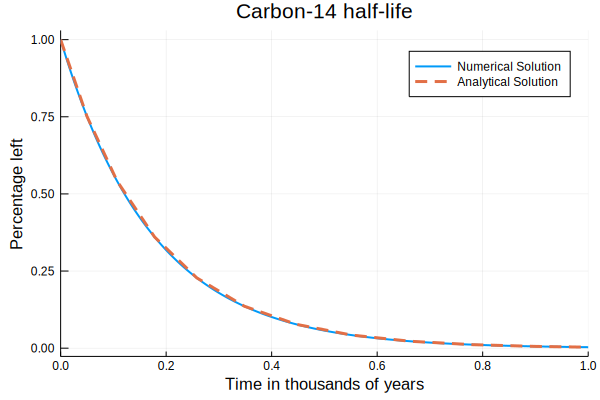

In [8]:
using OrdinaryDiffEq, Plots
gr()

#Half-life of Carbon-14 is 5,730 years.
C₁ = 5.730

#Setup
u₀ = 1.0
tspan = (0.0, 1.0)

#Define the problem
radioactivedecay(u,p,t) = -C₁*u

#Pass to solver
prob = ODEProblem(radioactivedecay,u₀,tspan)
sol = solve(prob,Tsit5())

#Plot
plot(sol,linewidth=2,title ="Carbon-14 half-life", xaxis = "Time in thousands of years", yaxis = "Percentage left", label = "Numerical Solution")
plot!(sol.t, t->exp(-C₁*t),lw=3,ls=:dash,label="Analytical Solution")

## Simple Pendulum

#### Second Order Linear ODE

We will start by solving the pendulum problem. In the physics class, we often solve this problem by small angle approximation, i.e. $ sin(\theta) \approx \theta$, because otherwise, we get an elliptic integral which doesn't have an analytic solution. The linearized form is

$$\ddot{\theta} + \frac{g}{L}{\theta} = 0$$

But we have numerical ODE solvers! Why not solve the *real* pendulum?

$$\ddot{\theta} + \frac{g}{L}{\sin(\theta)} = 0$$

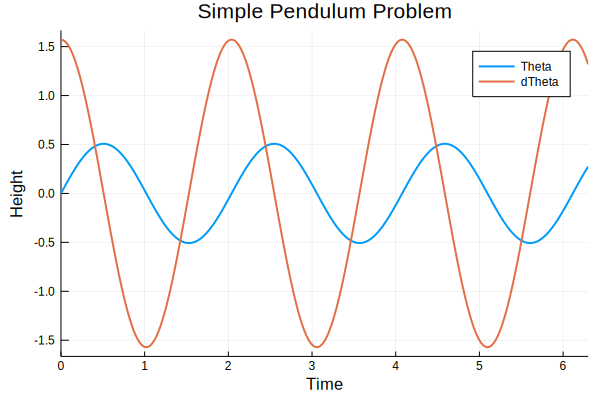

In [9]:
# Simple Pendulum Problem
using OrdinaryDiffEq, Plots

#Constants
const g = 9.81
L = 1.0

#Initial Conditions
u₀ = [0,π/2]
tspan = (0.0,6.3)

#Define the problem
function simplependulum(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*sin(θ)
end

#Pass to solvers
prob = ODEProblem(simplependulum,u₀, tspan)
sol = solve(prob,Tsit5())

#Plot
plot(sol,linewidth=2,title ="Simple Pendulum Problem", xaxis = "Time", yaxis = "Height", label = ["Theta","dTheta"])

So now we know that behaviour of the position versus time. However, it will be useful to us to look at the phase space of the pendulum, i.e., and representation of all possible states of the system in question (the pendulum) by looking at its velocity and position. Phase space analysis is ubiquitous in the analysis of dynamical systems, and thus we will provide a few facilities for it.

In [10]:
p = plot(sol,vars = (1,2), xlims = (-9,9), title = "Phase Space Plot", xaxis = "Velocity", yaxis = "Position", leg=false)
function phase_plot(prob, u0, p, tspan=2pi)
    _prob = ODEProblem(prob.f,u0,(0.0,tspan))
    sol = solve(_prob,Vern9()) # Use Vern9 solver for higher accuracy
    plot!(p,sol,vars = (1,2), xlims = nothing, ylims = nothing)
end
for i in -4pi:pi/2:4π
    for j in -4pi:pi/2:4π
        phase_plot(prob, [j,i], p)
    end
end
plot(p,xlims = (-9,9))

## Simple Harmonic Oscillator

### Double Pendulum

In [11]:
#Double Pendulum Problem
using OrdinaryDiffEq, Plots

#Constants and setup
const m₁, m₂, L₁, L₂ = 1, 2, 1, 2
initial = [0, π/3, 0, 3pi/5]
tspan = (0.,50.)

#Convenience function for transforming from polar to Cartesian coordinates
function polar2cart(sol;dt=0.02,l1=L₁,l2=L₂,vars=(2,4))
    u = sol.t[1]:dt:sol.t[end]

    p1 = l1*map(x->x[vars[1]], sol.(u))
    p2 = l2*map(y->y[vars[2]], sol.(u))

    x1 = l1*sin.(p1)
    y1 = l1*-cos.(p1)
    (u, (x1 + l2*sin.(p2),
     y1 - l2*cos.(p2)))
end

#Define the Problem
function double_pendulum(xdot,x,p,t)
    xdot[1]=x[2]
    xdot[2]=-((g*(2*m₁+m₂)*sin(x[1])+m₂*(g*sin(x[1]-2*x[3])+2*(L₂*x[4]^2+L₁*x[2]^2*cos(x[1]-x[3]))*sin(x[1]-x[3])))/(2*L₁*(m₁+m₂-m₂*cos(x[1]-x[3])^2)))
    xdot[3]=x[4]
    xdot[4]=(((m₁+m₂)*(L₁*x[2]^2+g*cos(x[1]))+L₂*m₂*x[4]^2*cos(x[1]-x[3]))*sin(x[1]-x[3]))/(L₂*(m₁+m₂-m₂*cos(x[1]-x[3])^2))
end

#Pass to Solvers
double_pendulum_problem = ODEProblem(double_pendulum, initial, tspan)
sol = solve(double_pendulum_problem, Vern7(), abs_tol=1e-10, dt=0.05);

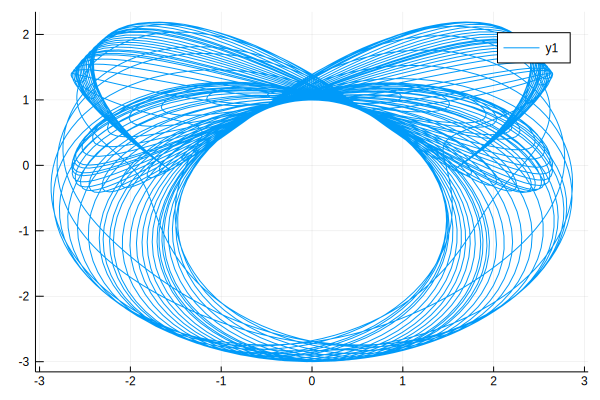

In [12]:
#Obtain coordinates in Cartesian Geometry
ts, ps = polar2cart(sol, l1=L₁, l2=L₂, dt=0.01)
plot(ps...)

### Poincaré section

The Poincaré section is a contour plot of a higher-dimensional phase space diagram. It helps to understand the dynamic interactions and is wonderfully pretty.

The following equation came from [StackOverflow question](https://mathematica.stackexchange.com/questions/40122/help-to-plot-poincar%C3%A9-section-for-double-pendulum)

$$\frac{d}{dt}
 \begin{pmatrix}
 \alpha \\ l_\alpha \\ \beta \\ l_\beta
 \end{pmatrix}=
 \begin{pmatrix}
  2\frac{l_\alpha - (1+\cos\beta)l_\beta}{3-\cos 2\beta} \\
  -2\sin\alpha - \sin(\alpha + \beta) \\
  2\frac{-(1+\cos\beta)l_\alpha + (3+2\cos\beta)l_\beta}{3-\cos2\beta}\\
  -\sin(\alpha+\beta) - 2\sin(\beta)\frac{(l_\alpha-l_\beta)l_\beta}{3-\cos2\beta} + 2\sin(2\beta)\frac{l_\alpha^2-2(1+\cos\beta)l_\alpha l_\beta + (3+2\cos\beta)l_\beta^2}{(3-\cos2\beta)^2}
 \end{pmatrix}$$

The Poincaré section here is the collection of $(β,l_β)$ when $α=0$ and $\frac{dα}{dt}>0$.

#### Hamiltonian of a double pendulum
Now we will plot the Hamiltonian of a double pendulum

In [13]:
#Constants and setup
using OrdinaryDiffEq
initial2 = [0.01, 0.005, 0.01, 0.01]
tspan2 = (0.,200.)

#Define the problem
function double_pendulum_hamiltonian(udot,u,p,t)
    α  = u[1]
    lα = u[2]
    β  = u[3]
    lβ = u[4]
    udot .=
    [2(lα-(1+cos(β))lβ)/(3-cos(2β)),
    -2sin(α) - sin(α+β),
    2(-(1+cos(β))lα + (3+2cos(β))lβ)/(3-cos(2β)),
    -sin(α+β) - 2sin(β)*(((lα-lβ)lβ)/(3-cos(2β))) + 2sin(2β)*((lα^2 - 2(1+cos(β))lα*lβ + (3+2cos(β))lβ^2)/(3-cos(2β))^2)]
end

# Construct a ContiunousCallback
condition(u,t,integrator) = u[1]
affect!(integrator) = nothing
cb = ContinuousCallback(condition,affect!,nothing,
                        save_positions = (true,false))

# Construct Problem
poincare = ODEProblem(double_pendulum_hamiltonian, initial2, tspan2)
sol2 = solve(poincare, Vern9(), save_everystep = false, callback=cb, abstol=1e-9)

function poincare_map(prob, u₀, p; callback=cb)
    _prob = ODEProblem(prob.f,[0.01, 0.01, 0.01, u₀],prob.tspan)
    sol = solve(_prob, Vern9(), save_everystep = false, callback=cb, abstol=1e-9)
    scatter!(p, sol, vars=(3,4), markersize = 2)
end

poincare_map (generic function with 1 method)

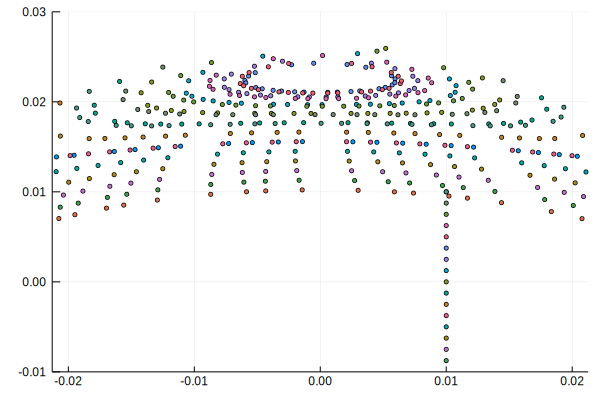

In [14]:
p = scatter(sol2, vars=(3,4), leg=false, markersize = 2, ylims=(-0.01,0.03))
for i in -0.01:0.00125:0.01
    poincare_map(poincare, i, p)
end
plot(p,ylims=(-0.01,0.03))

## Hénon-Heiles System

The Hénon-Heiles potential occurs when non-linear motion of a star around a galactic center with the motion restricted to a plane.

$$
\begin{align}
\frac{d^2x}{dt^2}&=-\frac{\partial V}{\partial x}\\
\frac{d^2y}{dt^2}&=-\frac{\partial V}{\partial y}
\end{align}
$$

where

$$V(x,y)={\frac {1}{2}}(x^{2}+y^{2})+\lambda \left(x^{2}y-{\frac {y^{3}}{3}}\right).$$

We pick $\lambda=1$ in this case, so

$$V(x,y) = \frac{1}{2}(x^2+y^2+2x^2y-\frac{2}{3}y^3).$$

Then the total energy of the system can be expressed by

$$E = T+V = V(x,y)+\frac{1}{2}(\dot{x}^2+\dot{y}^2).$$

The total energy should conserve as this system evolves.

In [15]:
using OrdinaryDiffEq, Plots

#Setup
initial = [0.,0.1,0.5,0]
tspan = (0,100.)

#Remember, V is the potential of the system and T is the Total Kinetic Energy, thus E will
#the total energy of the system.
V(x,y) = 1//2 * (x^2 + y^2 + 2x^2*y - 2//3 * y^3)
E(x,y,dx,dy) = V(x,y) + 1//2 * (dx^2 + dy^2);

#Define the function
function Hénon_Heiles(du,u,p,t)
    x  = u[1]
    y  = u[2]
    dx = u[3]
    dy = u[4]
    du[1] = dx
    du[2] = dy
    du[3] = -x - 2x*y
    du[4] = y^2 - y -x^2
end

#Pass to solvers
prob = ODEProblem(Hénon_Heiles, initial, tspan)
sol = solve(prob, Vern9(), abs_tol=1e-16, rel_tol=1e-16);

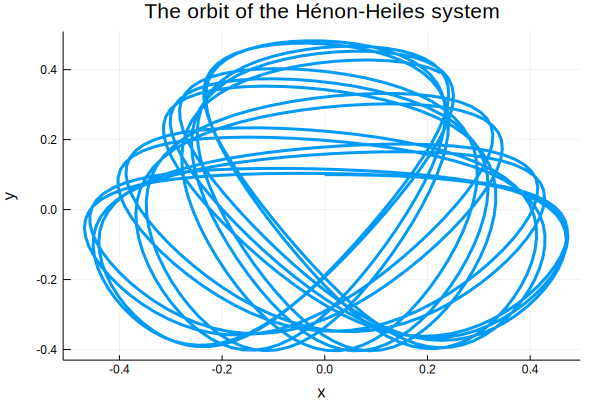

In [21]:
# Plot the orbit
plot(sol, vars=(1,2), title = "The orbit of the Hénon-Heiles system", xaxis = "x", yaxis = "y", leg=false)

sol.retcode = :Success


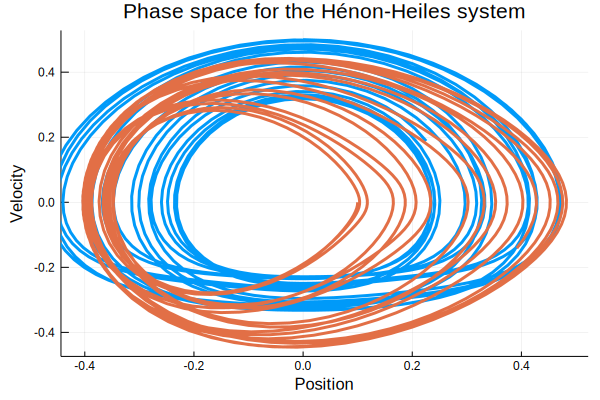

In [16]:
#Optional Sanity check - what do you think this returns and why?
@show sol.retcode

#Plot -
plot(sol, vars=(1,3), title = "Phase space for the Hénon-Heiles system", xaxis = "Position", yaxis = "Velocity")
plot!(sol, vars=(2,4), leg = false)

ΔE = energy[1] - energy[end] = -3.099845153070602e-5


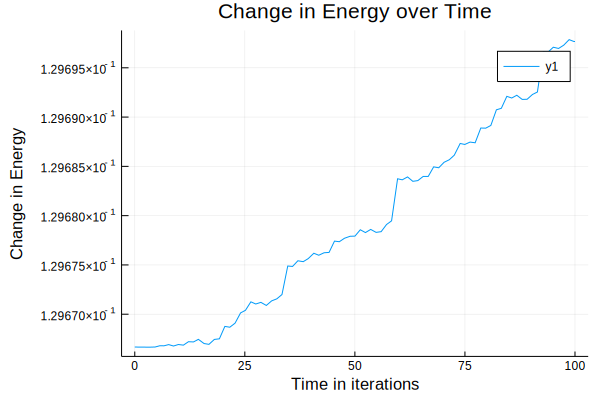

In [17]:
#We map the Total energies during the time intervals of the solution (sol.u here) to a new vector
#pass it to the plotter a bit more conveniently
energy = map(x->E(x...), sol.u)

#We use @show here to easily spot erratic behaviour in our system by seeing if the loss in energy was too great.
@show ΔE = energy[1]-energy[end]

#Plot
plot(sol.t, energy, title = "Change in Energy over Time", xaxis = "Time in iterations", yaxis = "Change in Energy")

### Symplectic Integration

To prevent energy drift, we can instead use a symplectic integrator. We can directly define and solve the `SecondOrderODEProblem`:

In [21]:
function HH_acceleration!(dv,v,u,p,t)
    x,y  = u
    dx,dy = dv
    dv[1] = -x - 2x*y
    dv[2] = y^2 - y -x^2
end
initial_positions = [0.0,0.1]
initial_velocities = [0.5,0.0]
prob = SecondOrderODEProblem(HH_acceleration!,initial_velocities,initial_positions,tspan)
sol2 = solve(prob, KahanLi8(), dt=1/10);

Notice that we get the same results:

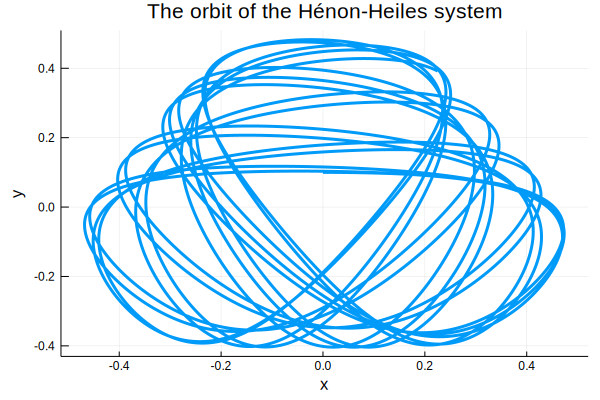

In [22]:
# Plot the orbit
plot(sol2, vars=(3,4), title = "The orbit of the Hénon-Heiles system", xaxis = "x", yaxis = "y", leg=false)

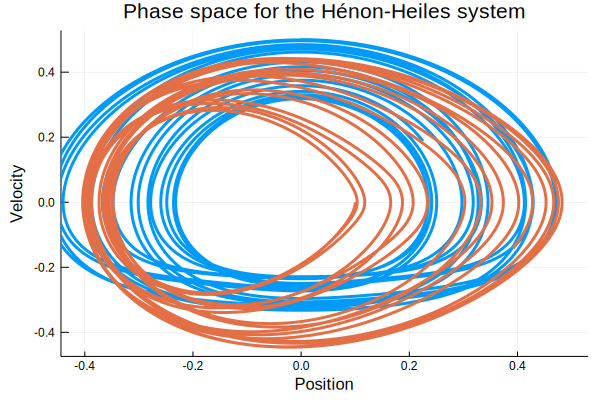

In [23]:
plot(sol2, vars=(3,1), title = "Phase space for the Hénon-Heiles system", xaxis = "Position", yaxis = "Velocity")
plot!(sol2, vars=(4,2), leg = false)

but now the energy change is essentially zero:

ΔE = energy[1] - energy[end] = 9.020562075079397e-15


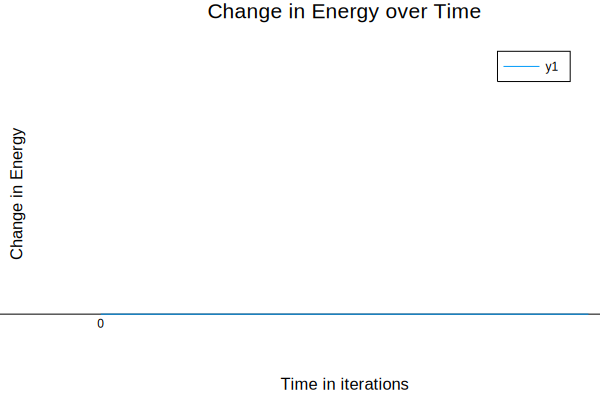

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW


In [24]:
energy = map(x->E(x[3], x[4], x[1], x[2]), sol2.u)
#We use @show here to easily spot erratic behaviour in our system by seeing if the loss in energy was too great.
@show ΔE = energy[1]-energy[end]

#Plot
plot(sol2.t, energy, title = "Change in Energy over Time", xaxis = "Time in iterations", yaxis = "Change in Energy")

It's so close to zero it breaks GR! And let's try to use a Runge-Kutta-Nyström solver to solve this. Note that Runge-Kutta-Nyström isn't symplectic.

ΔE = energy[1] - energy[end] = -8.017994408110463e-6


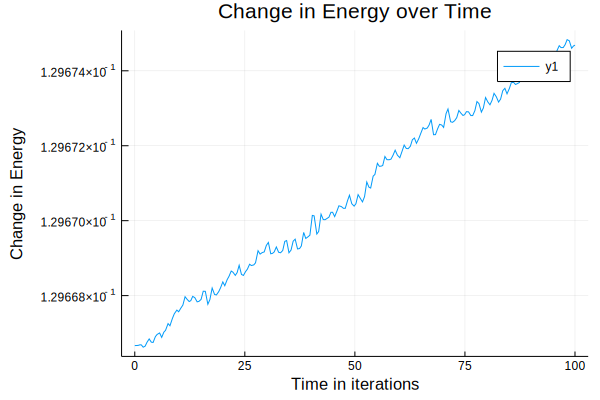

In [25]:
sol3 = solve(prob, DPRKN6());
energy = map(x->E(x[3], x[4], x[1], x[2]), sol3.u)
@show ΔE = energy[1]-energy[end]
gr()
plot(sol3.t, energy, title = "Change in Energy over Time", xaxis = "Time in iterations", yaxis = "Change in Energy")

Note that we are using the `DPRKN6` sovler at `reltol=1e-3` (the default), yet it has a smaller energy variation than `Vern9` at `abs_tol=1e-16, rel_tol=1e-16`. Therefore, using specialized solvers to solve its particular problem is very efficient.

In [27]:
?radau

search: RadauIIA5 readavailable isreadable radioactivedecay broadcast Broadcast

Couldn't find radau
Perhaps you meant rand, randn, read, read!, rpad, range, real, red or atan


No documentation found.

Binding `radau` does not exist.


In [29]:
using BenchmarkTools

In [30]:
@benchmark sin(x) setup=(x=rand())

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     4.200 ns (0.00% GC)
  median time:      4.600 ns (0.00% GC)
  mean time:        5.868 ns (0.00% GC)
  maximum time:     185.600 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000